### Homework - Visualize Daily Treasury Yield Curve Rates

1. Data Preparation


https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value_month=202310
    <br>Copy the data into Excel and save as csv file. Load into dataframe. Use Date as index.

In [1]:
# Installing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
data = pd.read_csv('daily-treasury-rates.csv')
data.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,10/30/2023,5.56,5.57,5.60,5.61,5.53,5.41,5.03,4.87,4.80,4.88,4.88,5.21,5.04
1,10/27/2023,5.57,5.57,5.59,5.60,5.55,5.39,4.99,4.84,4.76,4.83,4.84,5.19,5.03
2,10/26/2023,5.57,5.57,5.59,5.60,5.55,5.39,5.02,4.89,4.79,4.86,4.86,5.19,5.01
3,10/25/2023,5.56,5.57,5.59,5.61,5.57,5.43,5.08,4.98,4.89,4.98,4.95,5.27,5.09
4,10/24/2023,5.57,5.57,5.58,5.60,5.57,5.41,5.02,4.91,4.82,4.86,4.83,5.15,4.96


In [3]:
# Adding Date as an index
data.set_index('Date', inplace=True)
data

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
10/30/2023,5.56,5.57,5.60,5.61,5.53,5.41,5.03,4.87,4.80,4.88,4.88,5.21,5.04
10/27/2023,5.57,5.57,5.59,5.60,5.55,5.39,4.99,4.84,4.76,4.83,4.84,5.19,5.03
10/26/2023,5.57,5.57,5.59,5.60,5.55,5.39,5.02,4.89,4.79,4.86,4.86,5.19,5.01
10/25/2023,5.56,5.57,5.59,5.61,5.57,5.43,5.08,4.98,4.89,4.98,4.95,5.27,5.09
10/24/2023,5.57,5.57,5.58,5.60,5.57,5.41,5.02,4.91,4.82,4.86,4.83,5.15,4.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/09/2023,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66
01/06/2023,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
01/05/2023,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78


2. Plot curves on all columns in one graph

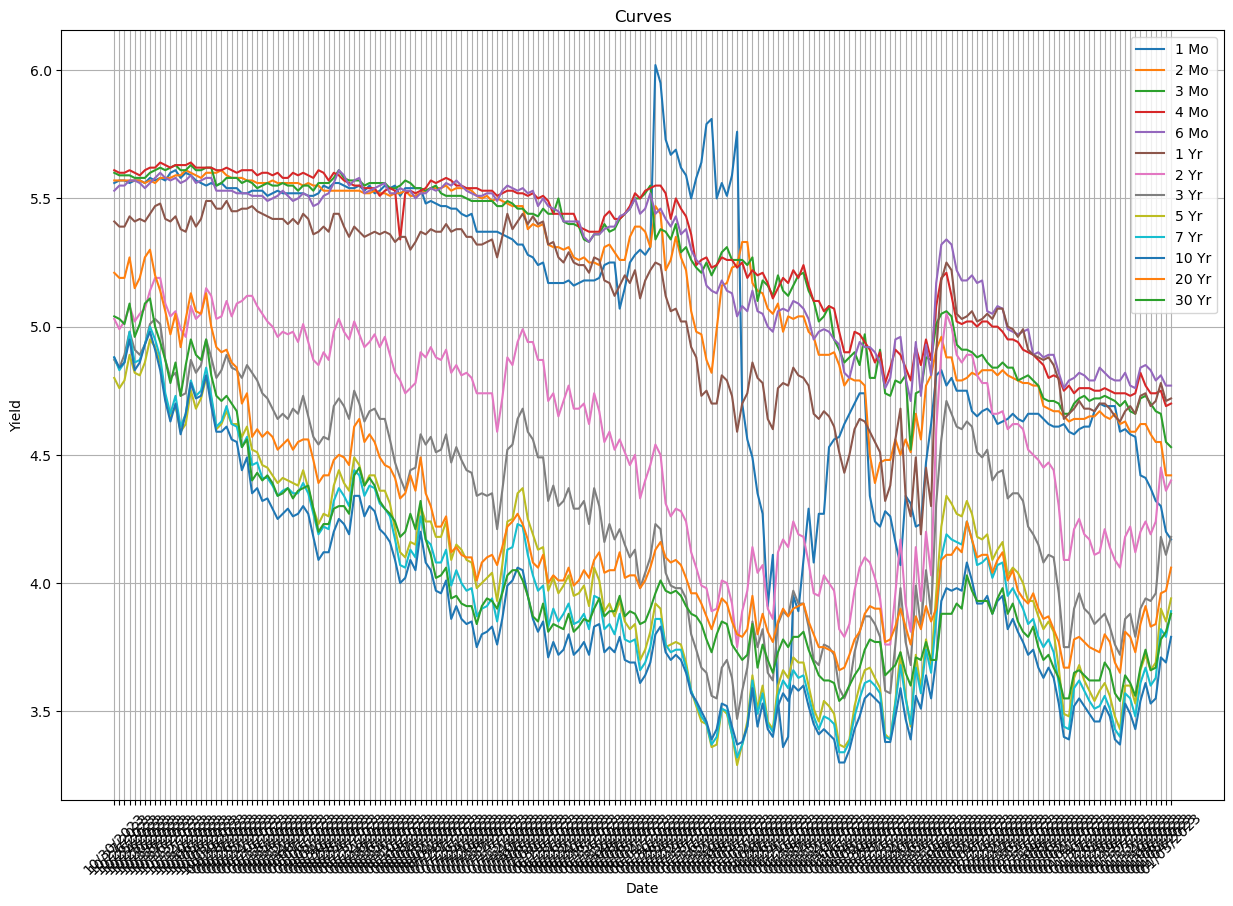

In [4]:
plt.figure(figsize = (15,10))

for column in data.columns:
    plt.plot(data.index, data[column], label = column)

plt.title('Curves')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
    

3. Pairplot all short rates (less than one year rate)

In [5]:
# Extracting columns less than 1 year
df = data.iloc[:, :5]
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo
Date,,,,,
10/30/2023,5.56,5.57,5.60,5.61,5.53
10/27/2023,5.57,5.57,5.59,5.60,5.55
10/26/2023,5.57,5.57,5.59,5.60,5.55
10/25/2023,5.56,5.57,5.59,5.61,5.57
10/24/2023,5.57,5.57,5.58,5.60,5.57
...,...,...,...,...,...
01/09/2023,4.37,4.58,4.70,4.74,4.83
01/06/2023,4.32,4.55,4.67,4.74,4.79
01/05/2023,4.30,4.55,4.66,4.75,4.81


/Users/shikshit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


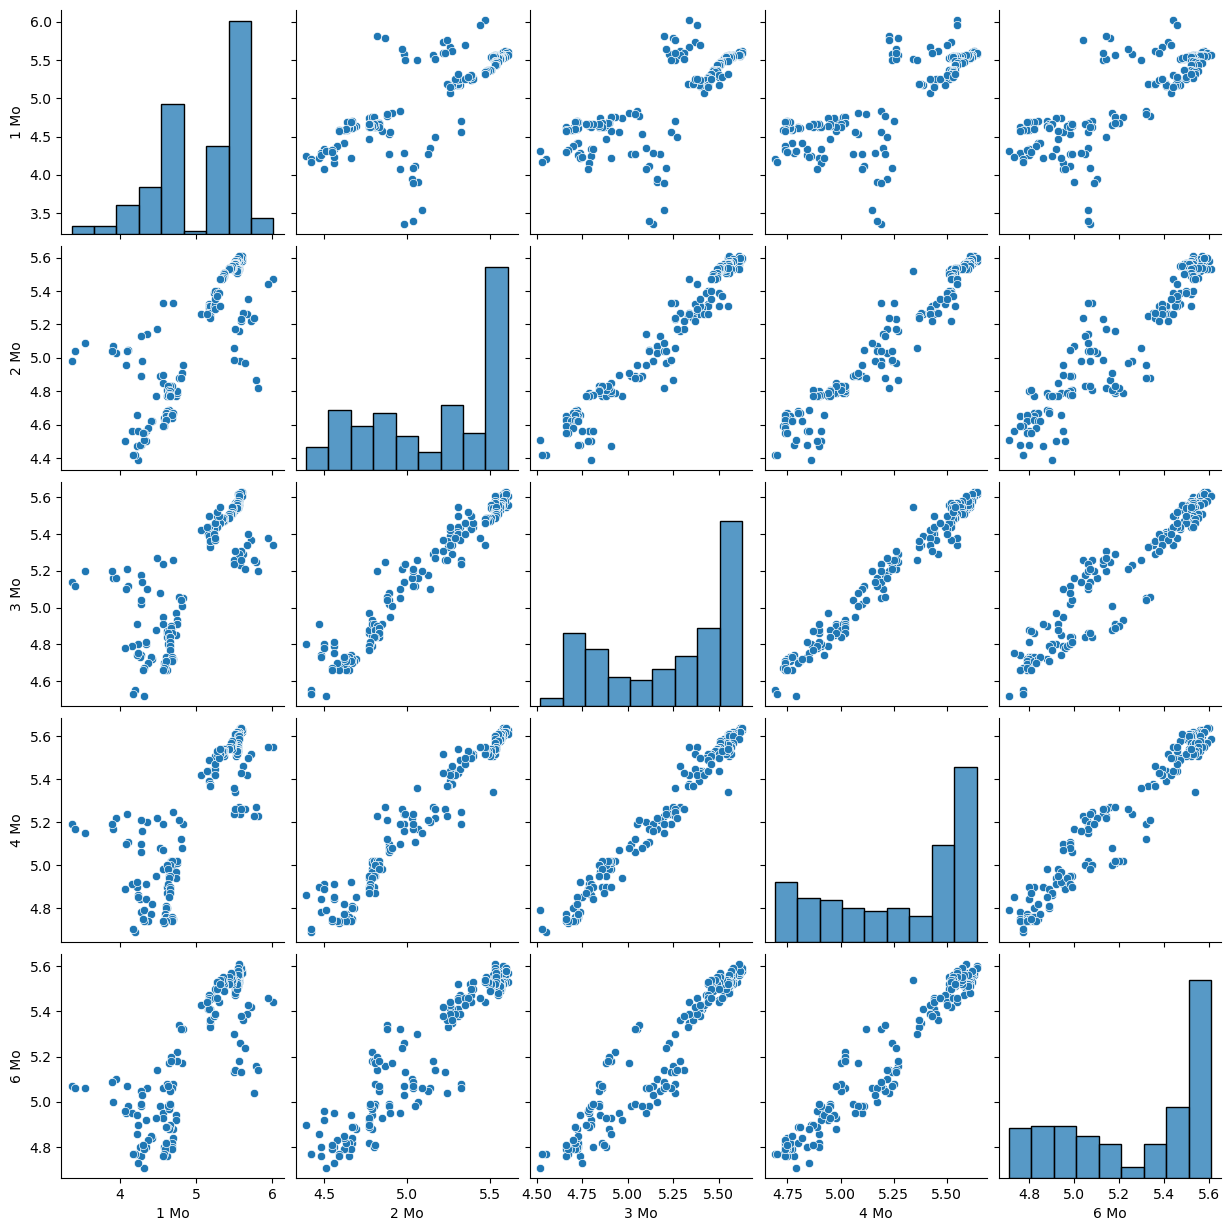

In [6]:
sns.pairplot(df)

4. Scatter plot a linear regression line for 2m and 3m rates.

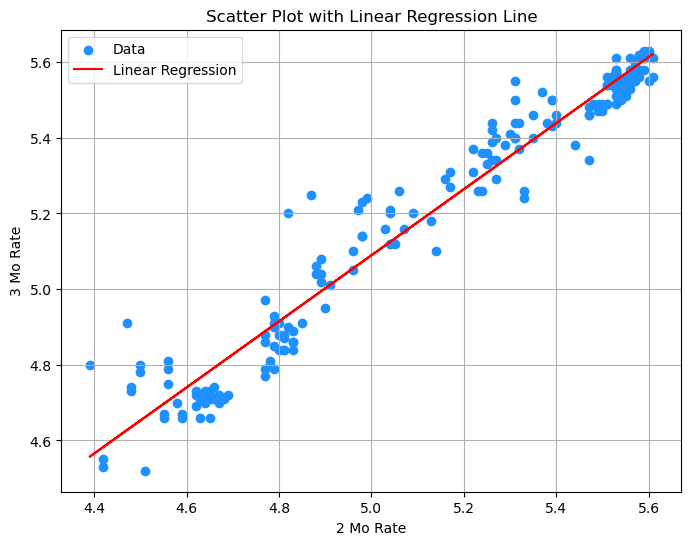

In [7]:
# Scatter plot of "2 Mo" and "3 Mo" rates
plt.figure(figsize=(8, 6))
plt.scatter(df['2 Mo'], df['3 Mo'], label='Data', color='dodgerblue')

# Fit a linear regression line
regression = np.polyfit(df['2 Mo'], df['3 Mo'], 1)
line = np.poly1d(regression)
plt.plot(df['2 Mo'], line(df['2 Mo']), label='Linear Regression', color='red')

plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('2 Mo Rate')
plt.ylabel('3 Mo Rate')
plt.legend()
plt.grid(True)
plt.show()

5. "kde" jointplot 2m and 3m rates

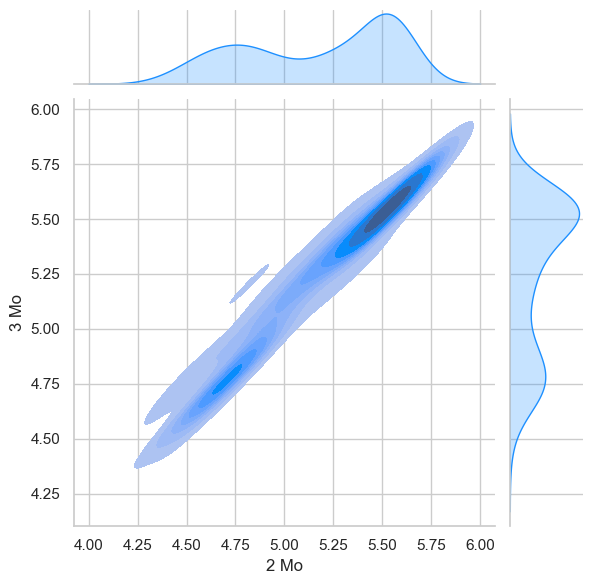

In [8]:
# Create a "kde" joint plot using seaborn
sns.set(style="whitegrid")
sns.jointplot(data=df, x="2 Mo", y="3 Mo", kind="kde", color="dodgerblue", fill = True)
plt.show()

6. boxplot all columns

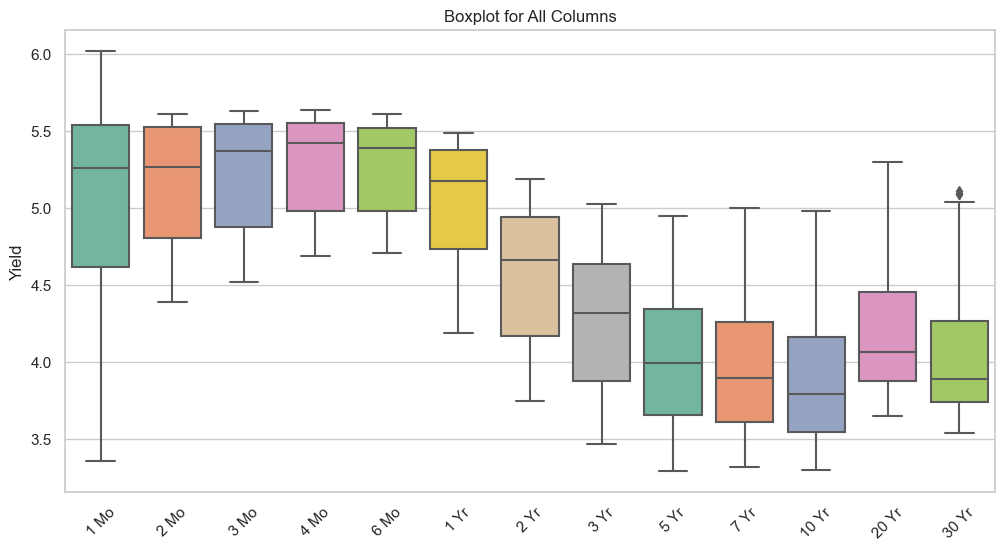

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns')
plt.ylabel('Yield')
plt.show()